# HANC with a Welfare State

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Test: Solving and simulating the household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
- 4. [Expected discounted utility](#toc4_)       
- 5. [Find transition path](#toc5_)
- 6. [Policy functions](#toc6_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [530]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCWelfareModel import HANCWelfareModelClass
from steady_state import obj_ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [531]:
model = HANCWelfareModelClass(name='baseline')

In [532]:
par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Test 1: Solving and simulating the household problem](#toc0_)

We set all the steady values for the household problem manually at ad hoc values:

In [533]:
ss.r = 0.02*(1-0.1)
ss.wt = 1.00*(1-0.3)
ss.chi = par.chi_ss
ss.S = 0.0
ss.tau = 0.015

We can now solve and simulate:

In [534]:
model.solve_hh_ss(do_print=True)

household problem in ss solved in 0.2 secs [345 iterations]


In [535]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 0.0 secs [425 iterations]


## 3. <a id='toc4_'></a>[Find stationary equilibrium](#toc0_)

$G$, $LG$ and $\chi = 0$

In [536]:
ss.G = 0.0

In [537]:
model.find_ss(do_print=True)

starting at KL=3.8624
starting at LY=1.0590

 message: The solution converged.
 success: True
  status: 1
     fun: [ 2.799e-11  4.019e-13]
       x: [ 3.673e+00  9.225e-01]
    nfev: 9
    fjac: [[-9.999e-01 -1.201e-02]
           [ 1.201e-02 -9.999e-01]]
       r: [-8.159e+00 -4.187e+00  1.043e+00]
     qtf: [-7.294e-08 -6.096e-10]

steady state found in 2.4 secs
ss.K =  3.389
ss.A_hh =  3.389
ss.Y =  1.363
ss.r =  0.021
ss.w =  1.034
ss.G =  0.000
ss.LG =  0.000
ss.LY =  0.923
ss.tau =  0.000
ss.clearing_A = 2.80e-11
ss.clearing_L = 4.02e-13
ss.clearing_Y = 3.28e-11


In [538]:
model.info(only_blocks=True,ss=True)

production_firm: [K=3.39,LY=0.92] -> [rK=0.12,w=1.03,Y=1.36]
mutual_fund: [K=3.39,rK=0.12] -> [A=3.39,r=0.02]
government: [w=1.03,G=0.00,LY=0.92,chi=0.00] -> [tau=0.00,wt=1.03,LG=0.00,L=0.92,S=0.00,B=0.00]
hh: [S=0.00,chi=0.00,r=0.02,tau=0.00,wt=1.03] -> [A_hh=3.39,C_hh=1.02,ELL_hh=0.99,L_hh=0.92,INC_hh=1.02,U_hh=-10000001.62]
market_clearing: [A=3.39,A_hh=3.39,L_hh=0.92,L=0.92,Y=1.36,C_hh=1.02,K=3.39,G=0.00] -> [I=0.34,clearing_A=0.00,clearing_L=0.00,clearing_Y=0.00]


In [539]:
model.test_path()

shocks: chi G 
unknowns: K LY 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production_firm
  rK               0.0e+00
  w                0.0e+00
  Y                0.0e+00
 blocks.mutual_fund
  A                0.0e+00
  r                0.0e+00
 blocks.government
  tau              0.0e+00
  wt               0.0e+00
  LG               0.0e+00
  L                0.0e+00
  S                0.0e+00
  B                0.0e+00
 hh
  A_hh             6.8e-10
  C_hh             2.0e-11
  ELL_hh           3.1e-11
  L_hh             2.6e-11
  INC_hh           1.2e-11
  U_hh             5.6e-08
 blocks.market_clearing
  I                1.7e-16
  clearing_A       6.6e-10 [target]
  clearing_L       2.6e-11 [target]
  clearing_Y       2.0e-11


## 4. <a id='toc9_'></a>[Expected discounted utility](#toc0_)

Utility for stationary equilibrium when $G$, $LG$ and $\chi = 0$

In [540]:
v_hh_ss = model.v_ss()
print(f'{v_hh_ss:.4f}')

-250000040.1070


Finding optimal $G$ and $L^G$

In [541]:
def target(G):
    ss.G = G
    model.find_ss(do_print=False)
    return -ss.U_hh

res = optimize.minimize_scalar(target,bounds=(0.0,0.4),method='bounded',options={'disp':3})
G_max_U_hh = res.x
max_U_hh = res.fun

 
 Func-count     x          f(x)          Procedure
    1       0.152786      8.68807        initial
    2       0.247214      6.92703        golden
    3       0.305573      7.25342        golden
    4       0.258769      6.89454        parabolic
    5       0.260821      6.89276        parabolic
    6       0.262821      6.89224        parabolic
    7       0.262694      6.89223        parabolic
    8       0.262683      6.89223        parabolic
    9       0.262687      6.89223        parabolic
   10        0.26268      6.89223        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


In [542]:
Gs = sorted([0.0,0.1,0.2,0.3]+[G_max_U_hh])
Y_G = np.zeros(len(Gs))
tau = np.zeros(len(Gs))
U_hh = np.zeros(len(Gs))

for i,G in enumerate(Gs):
    
    model_ = model.copy()
    model_.ss.G = G
    model_.find_ss(do_print=False)

    print(f'{model_.ss.G = :8.3f}')
    print(f'{model_.ss.G/model_.ss.Y = :8.3f}')
    print(f'{model_.v_ss() = :12.8f}\n')
    
    Y_G[i] = model_.ss.G/model_.ss.Y
    tau[i] = model_.ss.tau
    U_hh[i] = model_.ss.U_hh

model_.ss.G =    0.000
model_.ss.G/model_.ss.Y =    0.000
model_.v_ss() = -250000040.10695735

model_.ss.G =    0.200
model_.ss.G/model_.ss.Y =    0.193
model_.v_ss() = -185.92777460

model_.ss.G =    0.263
model_.ss.G/model_.ss.Y =    0.287
model_.v_ss() = -172.30586361

model_.ss.G =    0.300
model_.ss.G/model_.ss.Y =    0.359
model_.v_ss() = -178.81373169

model_.ss.G =    0.350
model_.ss.G/model_.ss.Y =    0.522
model_.v_ss() = -254.15274418



In [544]:
def target(x):
    chi = x
    ss.chi = chi
    model.find_ss(do_print=False)
    return -ss.U_hh

res = optimize.minimize_scalar(target,bounds=(-0.025,0.005),method='bounded',options={'disp':3})
chi_max_U_hh = res.x
max_U_hh = res.fun

 
 Func-count     x          f(x)          Procedure
    1      -0.013541      6.77544        initial
    2    -0.00645898      6.83316        golden
    3      -0.017918      6.74283        golden
    4     -0.0206231      6.72356        golden
    5     -0.0222949      6.71201        golden
    6     -0.0233282      6.70501        golden
    7     -0.0239667      6.70073        golden
    8     -0.0243614       6.6985        golden
    9     -0.0246053      6.69687        golden
   10     -0.0247561      6.69587        golden
   11     -0.0248493      6.69525        golden
   12     -0.0249068      6.69487        golden
   13     -0.0249424      6.69464        golden
   14     -0.0249644      6.69449        golden
   15      -0.024978       6.6944        golden
   16     -0.0249864      6.69435        golden
   17     -0.0249916      6.69431        golden
   18     -0.0249949      6.69429        golden

Optimization terminated successfully;
The returned value satisfies the terminatio

In [545]:
v_hh_ss = model.v_ss()
print(f'{v_hh_ss:.4f}')

-167.3572


In [546]:
def target(x):
    G,chi = x
    ss.G = G
    ss.chi = chi
    model.find_ss(do_print=False)
    return -ss.U_hh

bounds = [(0.0, 0.3),(-0.025, 0.001)]  # Bounds for G and chi
initial_guess = [0.2,0.0]  # Example initial guess for G and chi
res = optimize.minimize(target,initial_guess,bounds=bounds,method='L-BFGS-B',options={'disp': 3})
G_max_U_hh = res.x[0]
chi_max_U_hh = res.x[1]
max_U_hh = -res.fun

In [547]:
chis = sorted([-0.025,-0.005,0.0,0.0005]+[chi_max_U_hh])

for i,chi in enumerate(chis):
    
    model_ = model.copy()
    model_.ss.chi = chi
    model_.find_ss(do_print=False)

    print(f'{model_.ss.chi = :8.5f}')
    print(f'{model_.ss.G = :8.3f}')
    print(f'{model_.ss.G/model_.ss.Y = :8.3f}')
    print(f'{model_.v_ss() = :12.8f}\n')

model_.ss.chi = -0.02500
model_.ss.G =    0.278
model_.ss.G/model_.ss.Y =    0.295
model_.v_ss() = -166.72118631

model_.ss.chi = -0.02500
model_.ss.G =    0.278
model_.ss.G/model_.ss.Y =    0.295
model_.v_ss() = -166.72118631

model_.ss.chi = -0.00500
model_.ss.G =    0.278
model_.ss.G/model_.ss.Y =    0.309
model_.v_ss() = -171.62996292

model_.ss.chi =  0.00000
model_.ss.G =    0.278
model_.ss.G/model_.ss.Y =    0.313
model_.v_ss() = -173.19455716

model_.ss.chi =  0.00050
model_.ss.G =    0.278
model_.ss.G/model_.ss.Y =    0.314
model_.v_ss() = -173.36124932



In [548]:
ss.chi = chi_max_U_hh
ss.G = G_max_U_hh

model.find_ss(do_print=False)

v_hh_ss = model.v_ss()
print(f'{v_hh_ss:.4f}')

-166.7212


In [549]:
# def optimize_welfare_policies(model, par, ss, Gamma_Y_values):
#     results = {}

#     for Gamma_Y in Gamma_Y_values:
#         par.Gamma_Y = Gamma_Y

#         def target(x):
#             # x[0] is G, x[1] is chi
#             G = x[0]
#             chi = x[1]
            
#             # Use the relationship G = Gamma_G * LG
#             # LG = G / par.Gamma_G
            
#             # Update the model with these values
#             ss.G = G
#             # ss.LG = LG
#             ss.chi = chi
#             model.find_ss(do_print=False)
            
#             return -ss.U_hh

#         # Optimize G and chi
#         initial_guess = [0.1, 0.0]  # Example initial guesses for G and chi
#         bounds = [(0.0, 0.4), (-0.01, 0.0005)]  # Example bounds for G and chi
#         res = optimize.minimize(target, initial_guess, bounds=bounds, method='L-BFGS-B')
        
#         optimal_G = res.x[0]
#         optimal_chi = res.x[1]
#         # optimal_LG = optimal_G / par.Gamma_G

#         # Update model with the optimal values
#         ss.G = optimal_G
#         ss.chi = optimal_chi
#         # ss.LG = optimal_LG
#         model.find_ss(do_print=True)
        
#         # Compute additional results
#         V_hh_ss = np.sum([par.beta**t * ss.U_hh for t in range(par.T)])
#         G_over_Y = ss.G / ss.Y

#         results[(Gamma_Y)] = {
#             'opt_G': optimal_G,
#             'opt_chi': optimal_chi,
#             'opt_LG': ss.LG,
#             'V_hh_ss': V_hh_ss,
#             'G_over_Y': G_over_Y,
#         }

#         print(f"For Gamma_Y = {Gamma_Y}:")
#         print(f"Optimal ss.G: {optimal_G:.4f}")
#         print(f"Optimal ss.chi: {optimal_chi:.4f}")
#         print(f"Optimal ss.LG: {ss.LG:.4f}")
#         print(f"Total expected utility: {V_hh_ss:.4f}")
#         print(f"G/Y: {G_over_Y:.4f}\n")

#     return results

In [550]:
# results = optimize_welfare_policies(model, par, ss, Gamma_Y_values=[1.0])

In [551]:
# def optimize_welfare_policies(model, par, ss, chi_values, Gamma_Y_values):
#     results = {}

#     for Gamma_Y in Gamma_Y_values:
#         par.Gamma_Y = Gamma_Y

#         # Part b) and c)
#         for chi in chi_values:
#             ss.chi = chi

#             def target(G):
#                 # Use the relationship G = Gamma_G * LG
#                 LG = G/par.Gamma_G
#                 ss.G = G
#                 ss.LG = LG
#                 model.find_ss(do_print=False)
#                 return -ss.U_hh

#             # Optimize G and LG given 
#             res = optimize.minimize_scalar(target, bounds=(0.0, 0.5), method='bounded')
#             optimal_G = res.x
#             optimal_LG = optimal_G/par.Gamma_G

#             # Update model with the optimal values
#             ss.G = optimal_G
#             ss.LG = optimal_LG
#             model.find_ss(do_print=False)
            
#             # Compute additional results
#             V_hh_ss = np.sum([par.beta**t * ss.U_hh for t in range(par.T)])
#             G_over_Y = ss.G / ss.Y

#             results[(chi, Gamma_Y)] = {
#                 'opt_G': optimal_G,
#                 'opt_LG': optimal_LG,
#                 'V_hh_ss': V_hh_ss,
#                 'G_over_Y': G_over_Y,
#             }

#             print(f"For chi = {chi}, Gamma_Y = {Gamma_Y}:")
#             print(f"Optimal ss.G: {optimal_G:.4f}")
#             print(f"Optimal ss.LG: {optimal_LG:.4f}")
#             print(f"Total expected utility: {V_hh_ss:.4f}")
#             print(f"G/Y: {G_over_Y:.4f}\n")

#     return results

In [552]:
# result_fixed_chi = optimize_welfare_policies(model,par,ss,chi_values=[0.0],Gamma_Y_values=[1.0])

In [553]:
# chi_values = [-0.005, 0.005] 
# results = optimize_welfare_policies(model, par, ss, chi_values, Gamma_Y_values=[1.0])

In [554]:
# chi_values = [-0.005, 0.0, 0.005]
# result_increased_TFP = optimize_welfare_policies(model, par, ss, chi_values, Gamma_Y_values=[1.1])

In [555]:
# def optimize_welfare_policies(model, par, ss, chi_values, Gamma_Y):

#     def target(G, chi):
#         ss.chi = chi
#         par.Gamma_Y = Gamma_Y
#         ss.G = G
#         model.find_ss(do_print=False)
#         return -ss.U_hh

#     results = {}

#     for chi in chi_values:
#         res = optimize.minimize_scalar(target, args=(chi,), bounds=(0.0, 0.1), method='bounded')
#         ss.G = res.x
#         max_U_hh = res.fun

#         model.find_ss(do_print=True)
#         V_hh_ss = np.sum([par.beta**t * ss.U_hh for t in range(par.T)])

#         results[chi] = {
#             'opt_G': ss.G,
#             'opt_LG': ss.LG,
#             'V_hh_ss': V_hh_ss,
#             'G_over_Y': ss.G / ss.Y
#         }

#         print(f"For chi = {chi}:")
#         print(f"Optimal ss.G: {results[chi]['opt_G']:.4f}")
#         print(f"Optimal ss.LG: {results[chi]['opt_LG']:.4f}")
#         print(f"Total expected utility: {results[chi]['V_hh_ss']:.4f}")
#         print(f"G/Y: {results[chi]['G_over_Y']:.4f}\n")

#     return results

## 5. <a id='toc9_'></a>[Find transition path](#toc0_)

Jacobians

In [556]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for S               in 0.4 secs
curly_Y and curly_D calculated for chi             in 0.5 secs
curly_Y and curly_D calculated for r               in 0.4 secs
curly_Y and curly_D calculated for tau             in 0.4 secs
curly_Y and curly_D calculated for wt              in 0.3 secs
curly_E calculated in 0.6 secs
builiding blocks combined in 0.2 secs
household Jacobian computed in 2.8 secs

full Jacobians:
full Jacobian to unknowns computed in 0.7 secs [in evaluate_blocks(): 0.4 secs]
full Jacobian to shocks computed in 0.7 secs [in evaluate_blocks(): 0.3 secs]


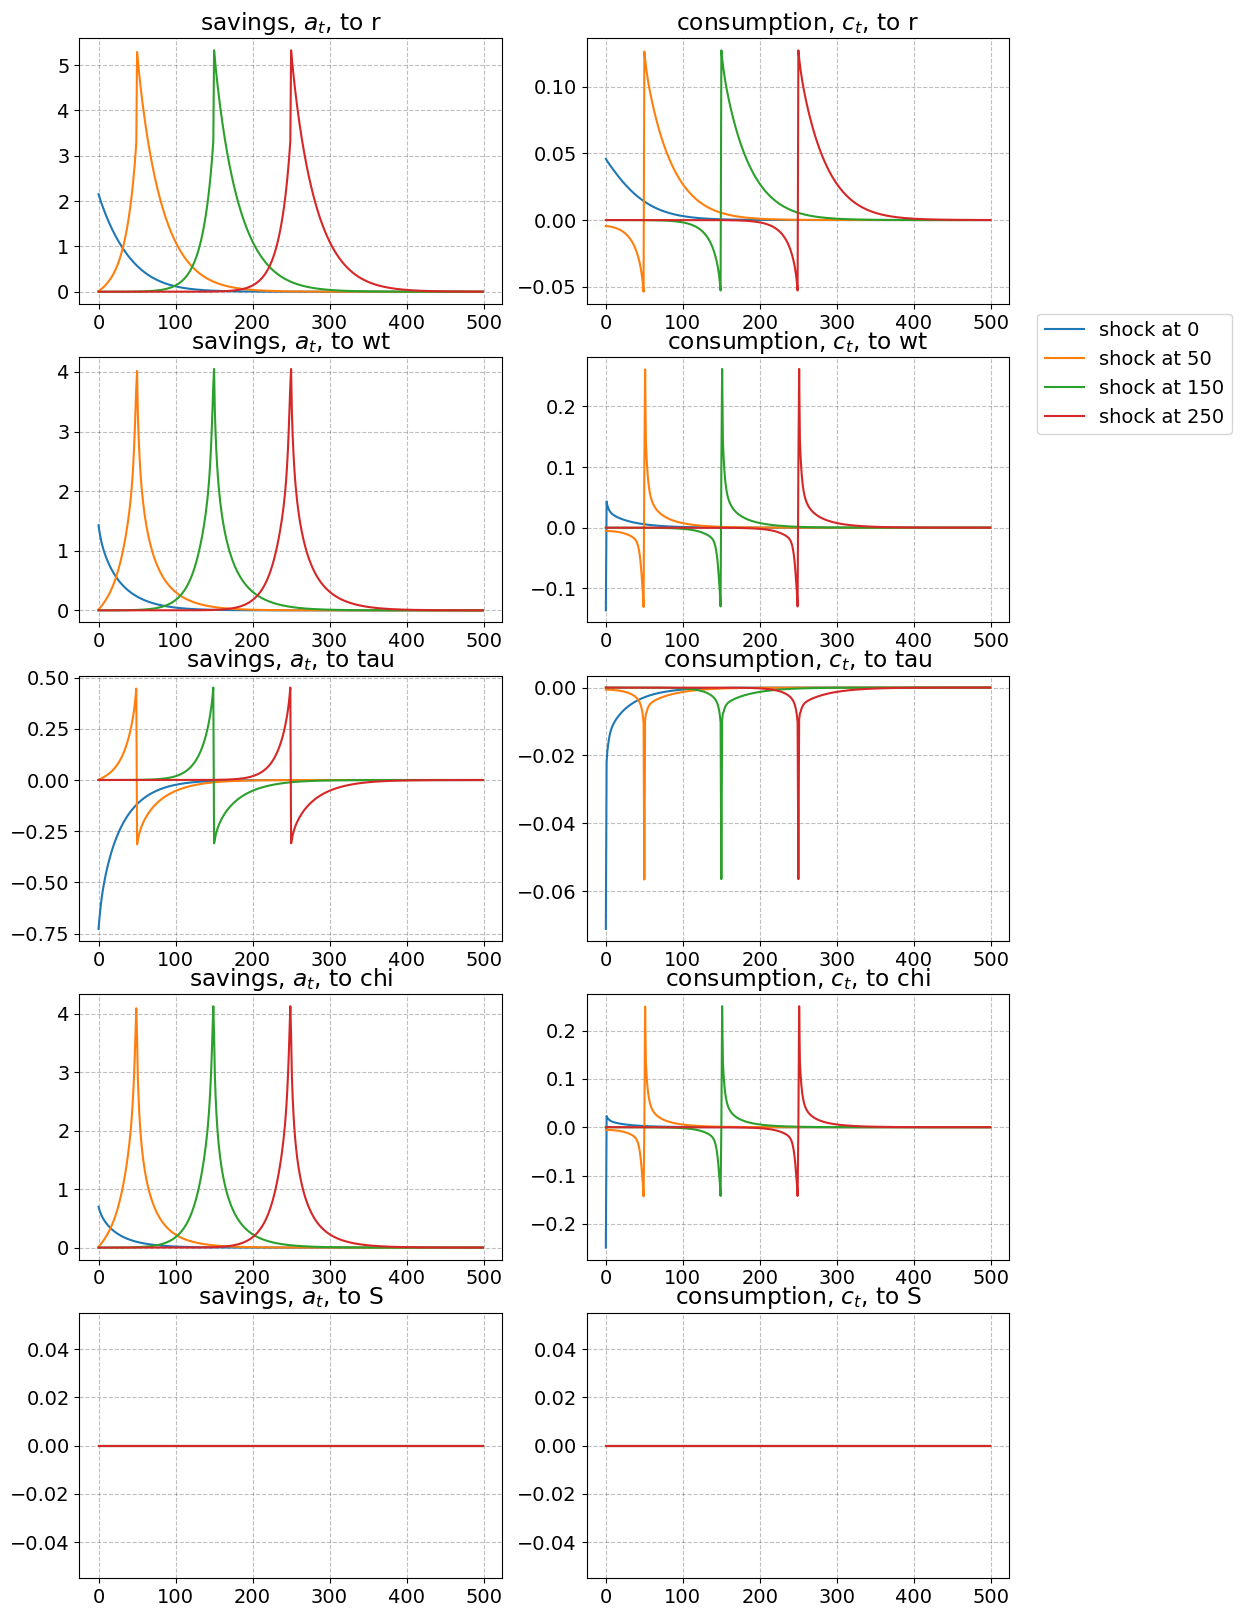

In [586]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
    if i == 1:
        ax.legend(frameon=True,bbox_to_anchor=(2.75,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')

In [583]:
jump = ss.G*0.01
rho = 0.95
dG = jump*rho**np.arange(par.T)

In [592]:
model.find_transition_path(shocks=['G','chi'],do_print=True)
path = model.path

finding the transition path:
 it =   0 -> max. abs. error = 5.56e-10
   5.56e-10 in clearing_A
   4.23e-11 in clearing_L
 it =   1 -> max. abs. error = 5.63e-10
   5.63e-10 in clearing_A
   3.25e-11 in clearing_L
 it =   2 -> max. abs. error = 1.57e-09
   1.57e-09 in clearing_A
   9.38e-11 in clearing_L
 it =   3 -> max. abs. error = 8.91e-11
   8.91e-11 in clearing_A
   1.40e-11 in clearing_L

transition path found in 1.6 secs


In [593]:
mean_c_ss = np.sum(ss.D*ss.c)
std_c_ss = np.sqrt(np.sum(ss.D*(ss.c-mean_c_ss)**2))   

for t in range(20):

    mean_c = np.sum(path.D[t]*path.c[t])
    std_c = np.sqrt(np.sum(path.D[t]*(path.c[t]-mean_c)**2))   

    print(f't = {t:2d}: {mean_c-mean_c_ss:7.4f}, {std_c-std_c_ss:7.4f}')

t =  0:  0.0000,  0.0000
t =  1:  0.0000,  0.0000
t =  2:  0.0000,  0.0000
t =  3:  0.0000,  0.0000
t =  4:  0.0000,  0.0000
t =  5:  0.0000,  0.0000
t =  6:  0.0000,  0.0000
t =  7:  0.0000,  0.0000
t =  8:  0.0000,  0.0000
t =  9:  0.0000,  0.0000
t = 10:  0.0000,  0.0000
t = 11:  0.0000,  0.0000
t = 12:  0.0000,  0.0000
t = 13:  0.0000,  0.0000
t = 14:  0.0000,  0.0000
t = 15:  0.0000,  0.0000
t = 16:  0.0000, -0.0000
t = 17:  0.0000, -0.0000
t = 18:  0.0000, -0.0000
t = 19:  0.0000, -0.0000


### shocks ###


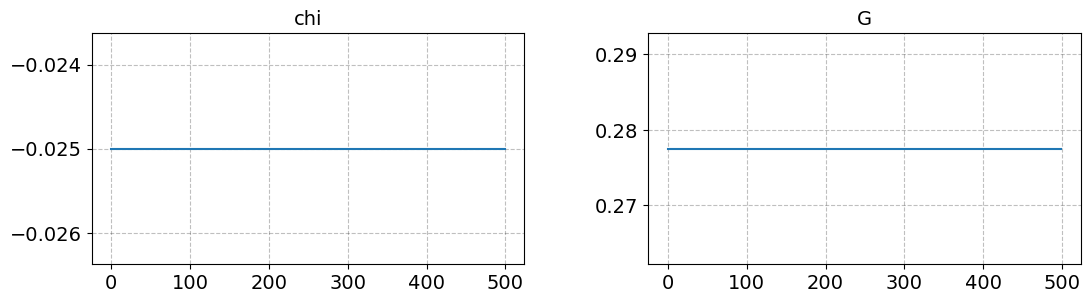


### varnames ###


c:\Users\Shark\anaconda3\Lib\site-packages\GEModelTools\figures.py:107: RuntimeWarning: invalid value encountered in divide
  ax.plot(np.arange(T_max),100*(pathvalue[:T_max]/ssvalue-1),label=label)


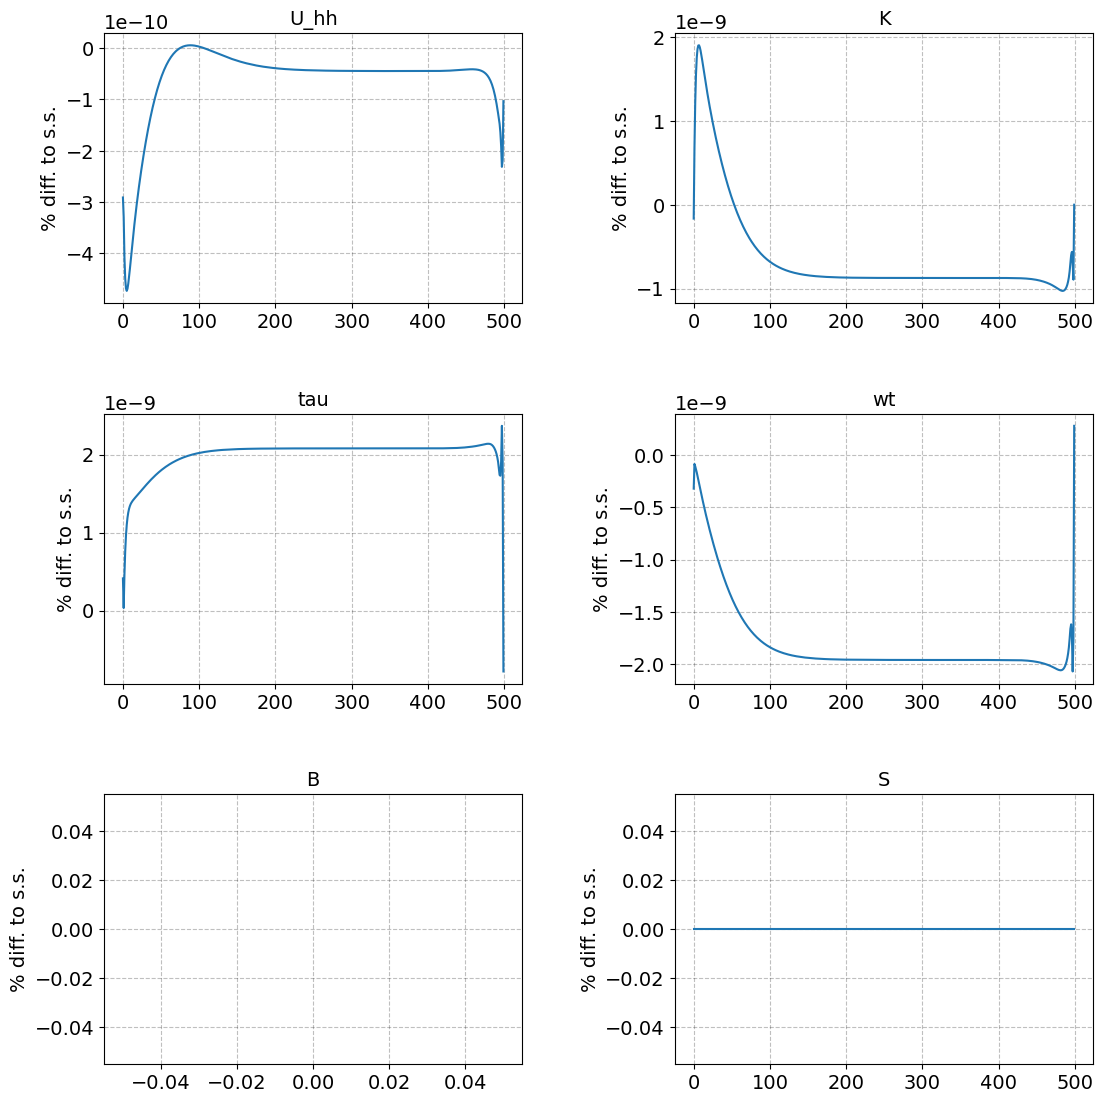


### tagets ###


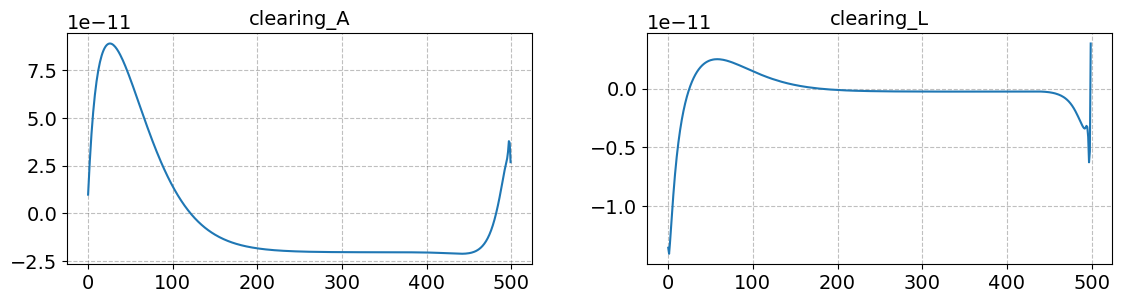

In [594]:
model.show_IRFs(varnames=['U_hh','K','tau','wt','B','S'],lvl_value=['G','chi'],ncols=2)

In [571]:
v_hh_ss = model.v_ss()
v_hh = model.v_path()
print(f'{v_hh_ss = :.5f}')
print(f'{v_hh = :.5f}')

v_hh_ss = -166.72119
v_hh = -166.72119


['chi']
household problem solved along transition path in 0.3 secs
household problem simulated along transition in 0.1 secs

['G']
household problem solved along transition path in 0.3 secs
household problem simulated along transition in 0.0 secs

None
household problem solved along transition path in 0.3 secs
household problem simulated along transition in 0.0 secs

all
household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.0 secs



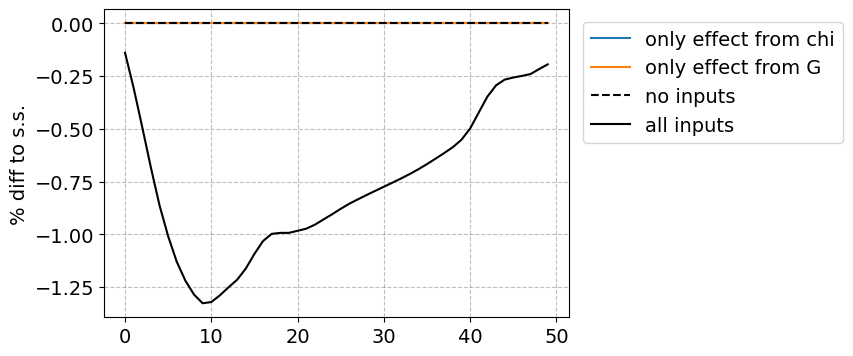

In [589]:
T_max = 50

fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
    
i_color = 0
for use_inputs in [['chi'],['G'],None,'all']:
    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=True,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'only effect from {use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.A_hh[:50]/ss.A_hh-1)*100,ls=ls,color=color,label=label);

ax.set_ylabel('% diff to s.s.')
ax.legend(frameon=True,bbox_to_anchor=(1.01,0.99));

In [560]:
model_gamma = model.copy()
model_gamma.par.Gamma_Y = 1.1

In [561]:
model_gamma.find_ss(do_print=True)
model_gamma.compute_jacs(do_print=False)

starting at KL=4.4258
starting at LY=0.9224

 message: The solution converged.
 success: True
  status: 1
     fun: [ 1.064e-11 -4.219e-14]
       x: [ 4.033e+00  6.042e-01]
    nfev: 11
    fjac: [[-9.995e-01 -3.009e-02]
           [ 3.009e-02 -9.995e-01]]
       r: [-5.298e+00 -1.836e+00  1.090e+00]
     qtf: [ 1.225e-08 -4.182e-10]

steady state found in 3.6 secs
ss.K =  2.437
ss.A_hh =  2.437
ss.Y =  1.010
ss.r =  0.024
ss.w =  1.170
ss.G =  0.278
ss.LG =  0.278
ss.LY =  0.604
ss.tau =  0.560
ss.clearing_A = 1.06e-11
ss.clearing_L = -4.22e-14
ss.clearing_Y = -5.80e-03


In [562]:
model_gamma.find_transition_path(shocks=[],ini=model.ss.__dict__,do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 1.85e-01
   1.85e-01 in clearing_A
   2.30e-02 in clearing_L
backtracking...
backtracking...
backtracking...


c:\Users\Shark\OneDrive\Dokumenter\KU\AdvMacroHet\Assignments\Assignment_II\blocks.py:17: RuntimeWarning: invalid value encountered in power
  rK[:] = par.alpha*par.Gamma_Y*(K_lag/LY)**(par.alpha-1.0)
c:\Users\Shark\OneDrive\Dokumenter\KU\AdvMacroHet\Assignments\Assignment_II\blocks.py:19: RuntimeWarning: invalid value encountered in power
  w[:] = (1.0-par.alpha)*par.Gamma_Y*(K_lag/LY)**par.alpha
c:\Users\Shark\OneDrive\Dokumenter\KU\AdvMacroHet\Assignments\Assignment_II\blocks.py:22: RuntimeWarning: invalid value encountered in power
  Y[:] = par.Gamma_Y*K_lag**(par.alpha)*LY**(1.0-par.alpha)
c:\Users\Shark\anaconda3\Lib\site-packages\GEModelTools\GEModelClass.py:1644: UserWarning: warning: variable rK contains nan (blocks.production_firm)
  warnings.warn(f'warning: variable {varname} contains nan ({blockstr})')
c:\Users\Shark\anaconda3\Lib\site-packages\GEModelTools\GEModelClass.py:1644: UserWarning: warning: variable w contains nan (blocks.production_firm)
  warnings.warn(f'warning

backtracking...
 it =   1 -> max. abs. error = 1.98e-01
   1.98e-01 in clearing_A
   1.10e-01 in clearing_L
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   2 -> max. abs. error = 2.52e-01
   2.35e-01 in clearing_A
   2.52e-01 in clearing_L
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   3 -> max. abs. error = 3.84e-01
   1.84e-01 in clearing_A
   3.84e-01 in clearing_L
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   4 -> max. abs. error = 3.67e-01
   1.79e-01 in clearing_A
   3.67e-01 in clearing_L
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
backtracking...
 it =   5 -> max. abs. error = 3.93e-01
   2.15e-01 in clearing_A
   3.93e-01 in clearing_L
backtracking...
backtracking...
backtracking...
backtracking

ValueError: GEModelTools: No improvement for 5 iterations

In [ ]:
jump = ss.G*0.01
rho = 0.95
dG = jump*rho**np.arange(par.T)

B: terminal value is   0.11017124, but ss value is   0.00000000
### shocks ###


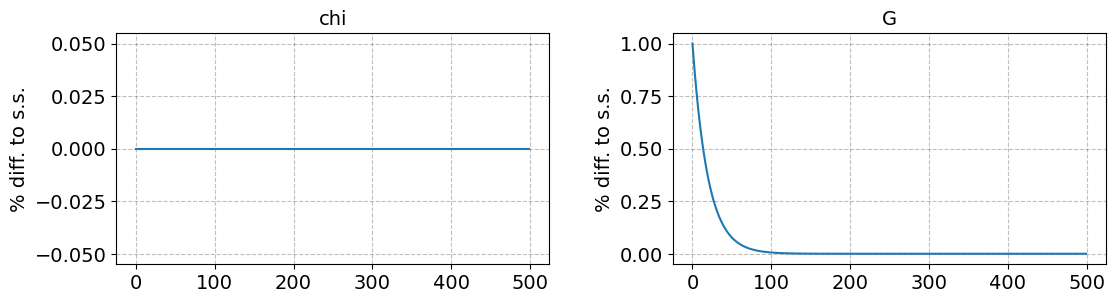


### varnames ###


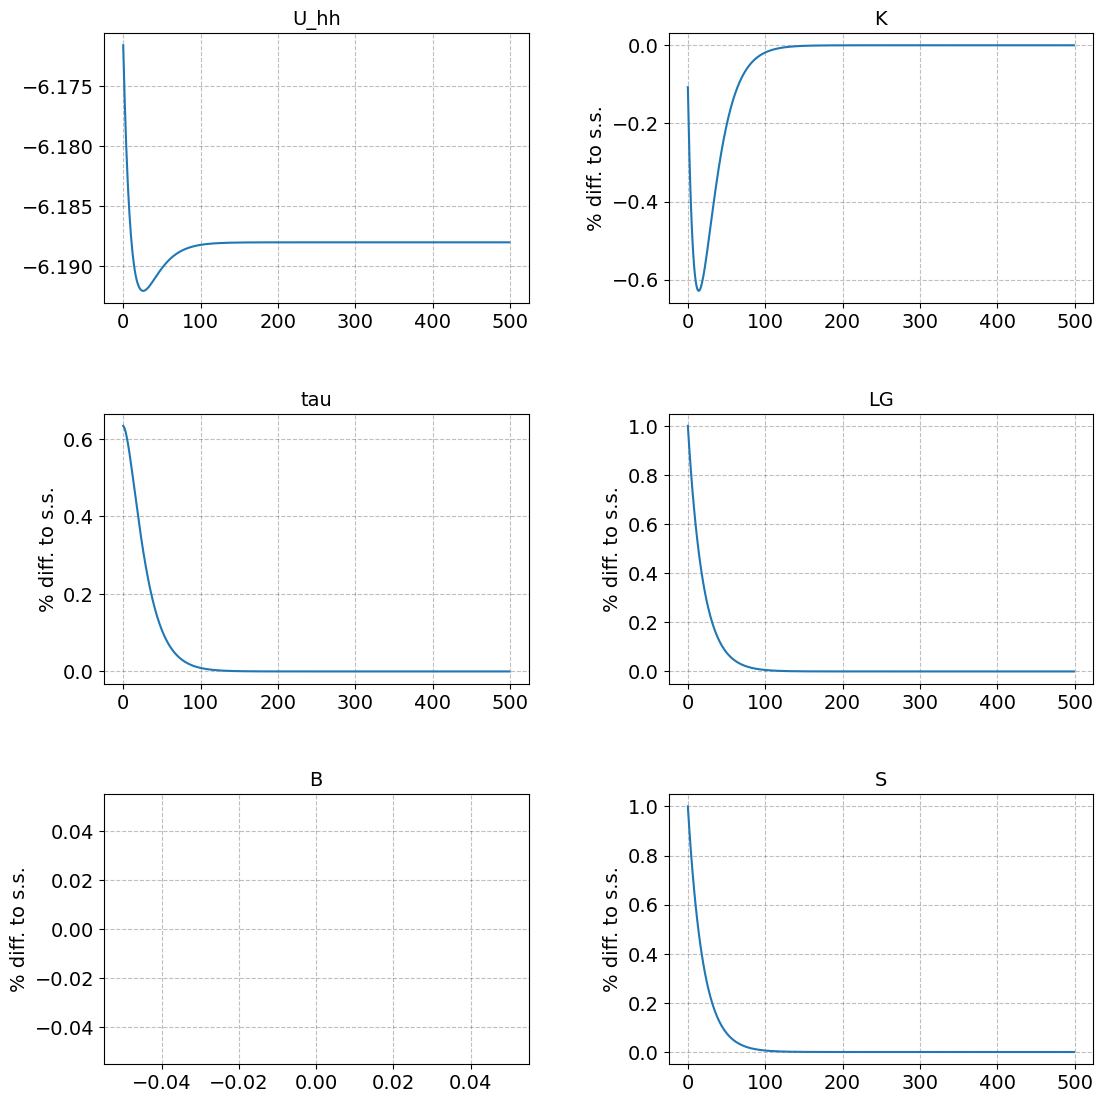


### tagets ###


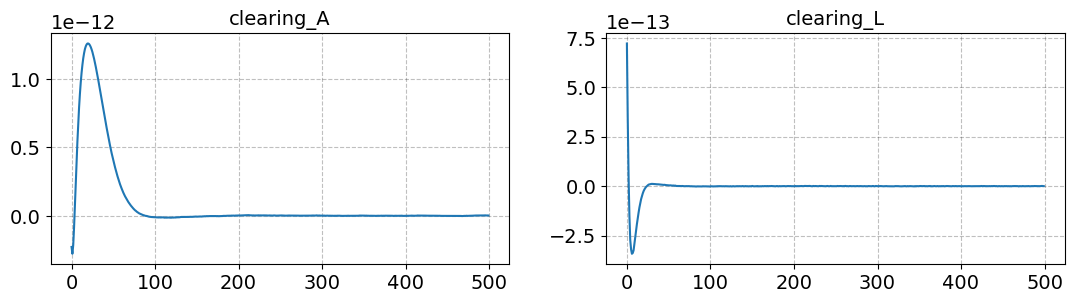

In [ ]:
model.find_transition_path(shocks={'dG':dG},do_print=False)
model.show_IRFs(varnames=['U_hh','K','tau','LG','B','S'],lvl_value=['U_hh'],ncols=2)

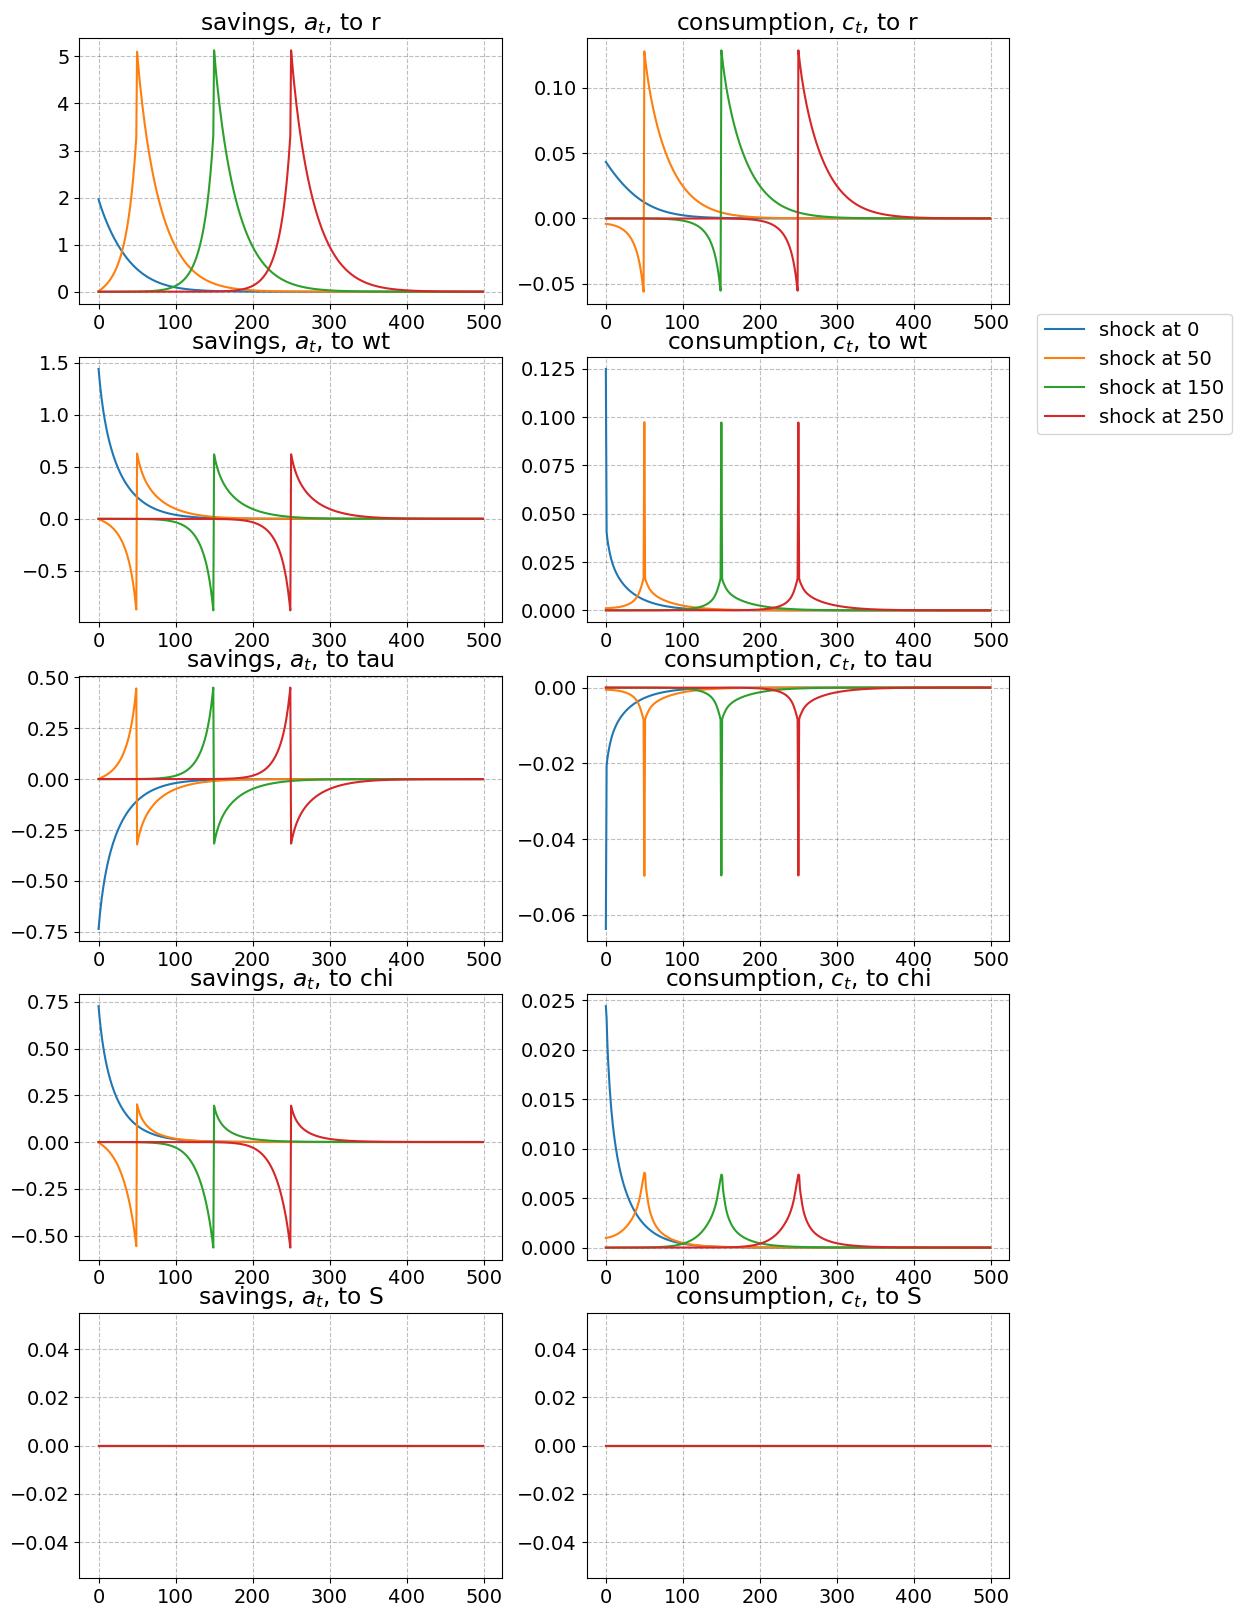

In [ ]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all)*4),dpi=100)

i = 0
for varname in model.inputs_hh:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
    if i == 1:
        ax.legend(frameon=True,bbox_to_anchor=(2.75,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
        
plt.show()

['Gamma_Y']
household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.1 secs

['chi']
household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.0 secs

['G']
household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.1 secs

['LG']
household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.0 secs

None
household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.0 secs

all
household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.0 secs



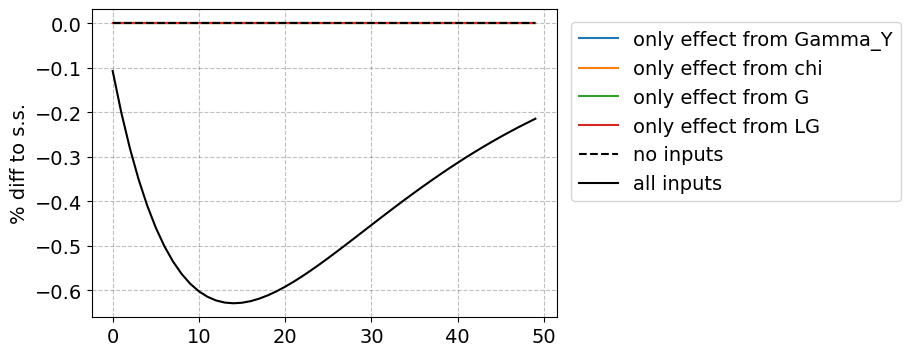

In [ ]:
T_max = 50

fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
    
i_color = 0
for use_inputs in [['Gamma_Y'],['chi'],['G'],['LG'],None,'all']:
    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=True,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'only effect from {use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.A_hh[:50]/ss.A_hh-1)*100,ls=ls,color=color,label=label);

ax.set_ylabel('% diff to s.s.')
ax.legend(frameon=True,bbox_to_anchor=(1.01,0.99));

note: inputs = steady state value -> expected: constant value (straigt line) in roughly -10^-5 to 10^5

household problem solved along transition path in 0.2 secs
household problem simulated along transition in 0.1 secs



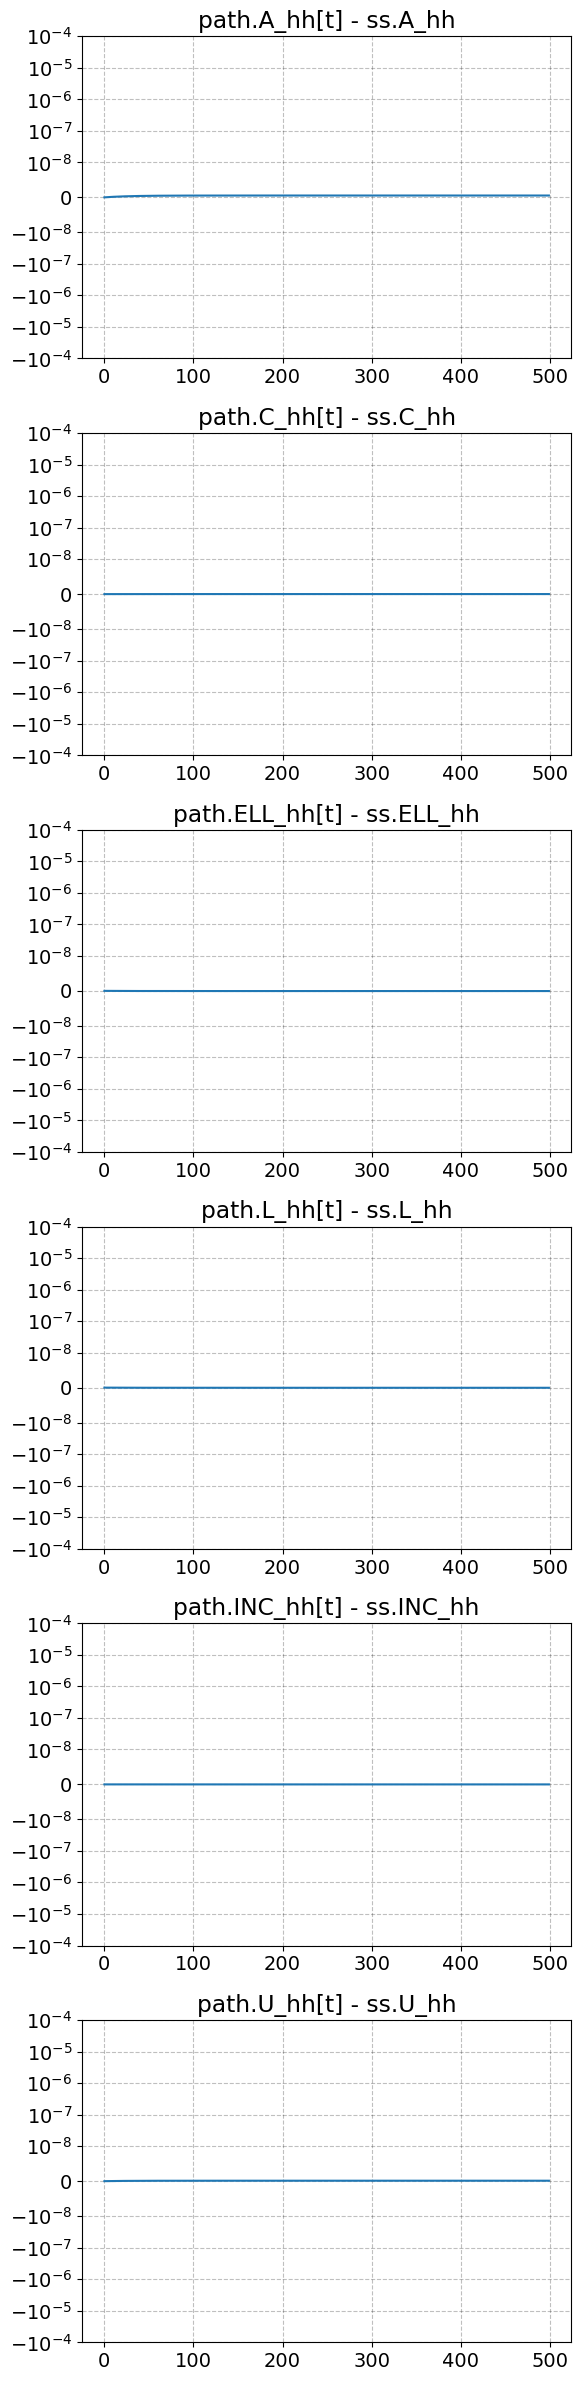

In [ ]:
model.test_hh_path()

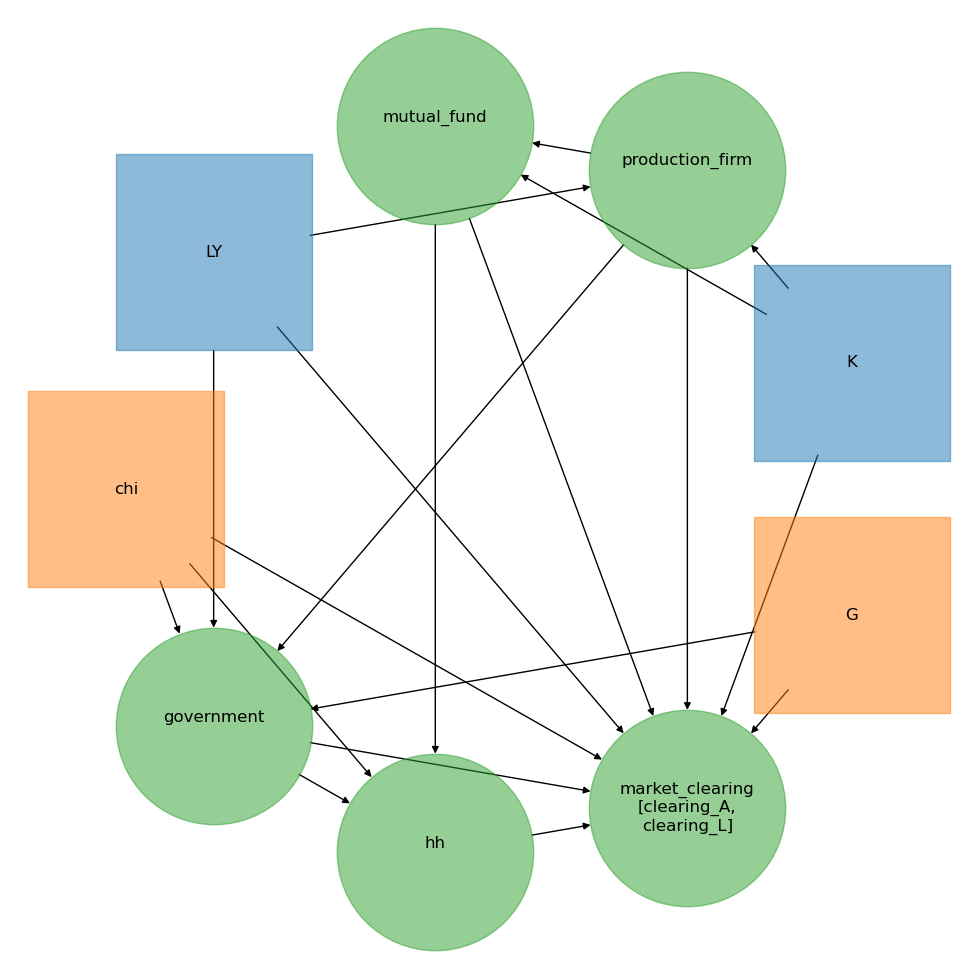

In [ ]:
model.draw_DAG(filename='DAG.png')

## 6. <a id='toc6_'></a>[Policy functions](#toc0_)

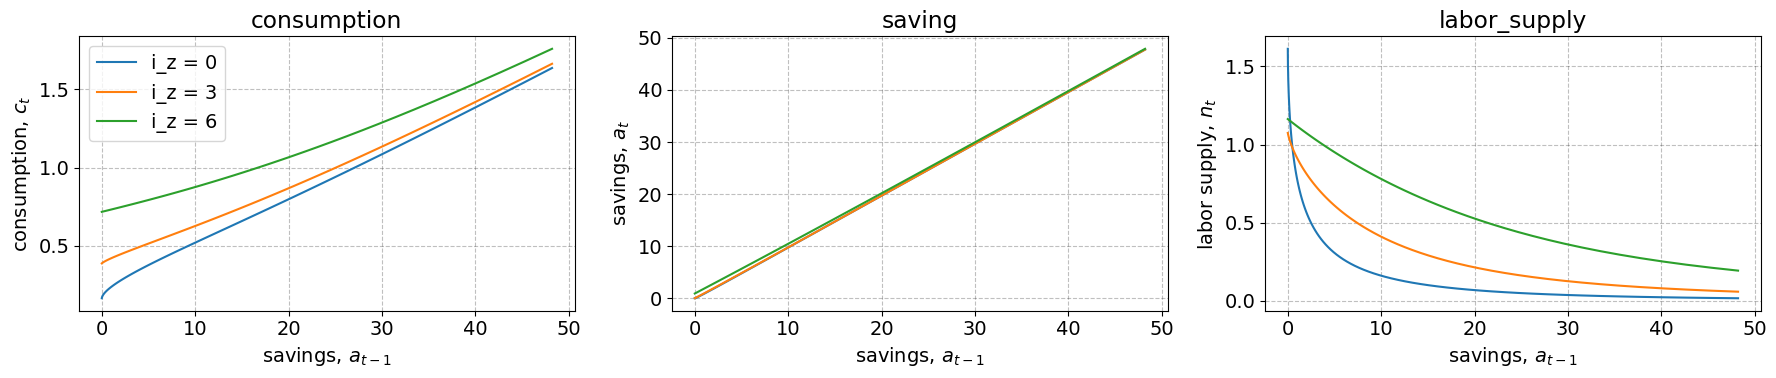

In [ ]:
i_fix = 0

fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 50

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[i_fix,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()
plt.show()